# Neural Network Assignment 1
## Name: Abdelrahman Mohamed Abdelhamid Ali Elbehery
## Section : 2
## ID : 1300759

---

## `FFNN` class

The class `FFNN` implements a feed-forward neural network, the class is flexible and allows any activation function and any derivative per layer. 

The class also relies on the `Layer` class that represent  separate layer object. The overall class diagram for the neural network can be represented as the following

![](assets/2017-11-25-23-52-15.png)

### Class features
+ Full vector operations : the class makes use of all `numpy` based matrix vector operations
+ Supports mean squared error and cross-entropy with output `softmax()` as cost function
+ Supports batch operations \[vectorized\]
+ Features a flexible number of fully connected stack of layers given at instantiation time
+ Each layer can have its own activation function for flexibility 

### Notation used inside the code

A neuron is defined as the following block

![](assets/2017-11-25-23-59-44.png)

Such that

+ `In` : the input coming from a previous layer
+ `W` : weight 
+ `F_net` : the multiply-accumulate function i.e. `W*IN`
+ `NET_u` : dot product scaler result that will be then given to the non-linear activation function
+ `f_act` : the nonlinear activation function of a neuron


### Back-propagation rules


The output layer update rule for the **mean squared error** is defined as the following

![](assets/2017-11-26-00-04-48.png)

+ `L` : a training example out of the data set
+ `o_u` : the label from the data set for the item `L`
+ `out_u` : the output neuron output for the current input
+ `d(out_u)/d(net_u)` : the derivative of the neuron output w.r.t the scaler `net_u` i.e. the derivative of the activation function

and for the cross-entropy with `softmax` as output activation function the output layer update rules are

![](assets/2017-11-26-00-14-31.png)

and for the hidden neurons the update rule is fixed whatever the loss function was, it is defined by the following rule

![](assets/2017-11-26-00-15-44.png)

At the `Layer.py` class implementation the update rules are

The delta term for the output layer is calculated by the following code section

```python
def calc_delta_out(self, target_vect):
    if self.cost_funct == 'mse':
        # mean squared error output delta calculation
        self.delta_vector = (target_vect - self.out_vector)*self.f_act_d(self.net)
    elif self.cost_funct == 'ce':
        # cross entropy error output delta calculation
        self.delta_vector = (target_vect - self.out_vector)
```

and for the hidden layers

```python
def calc_delta_hidden(self, succ_layer):
    """
    Calculate the delta terms of the hidden layers
    ### args
    - past_layer : the succ. layer object
    """
    self.delta_vector = np.dot(succ_layer.weight_matrix[:, 1:].T,
                                succ_layer.delta_vector)*self.f_act_d(self.net)

```

And the weight update rule for any neuron is calculated by the following code section

```python
def update_weights(self):
    """
    updates all the weights of the neural network
    """
    # broadcast
    # Sum the inputs in case of batch training
    self.weight_matrix += 1.0/self.batch_size*self.eta*np.dot(self.delta_vector, self.input_vector.T)
```

Notice `self.weight_matrix +=` since all the delta terms are flipped to ensure they are already negative when multiplied


### Testing the neural network against `Cifar-10`

A neural network is defined by the following parameters

```python
TRAIN_SIZE = 7000
TEST_SIZE = 700
# Train for 30 epochs
EPOCHS = 30
# each iteration use a batch of 2 items
BATCH_SIZE = 2
# learning rate 1e-2
LR = 1e-2 

# create NN object with 2 hidden layers each with 50 neurons
NN = FFNN([3072, 50, 50, 10], batch=BATCH_SIZE, eta=LR, cost_funct='ce')
```

The network accuracy output is shown in the next drawing

![](assets/2017-11-26-00-24-36.png)

Notice an accuracy of **30.142%** is achieved with this neural network.

The code is listed below

Epoch : 0
Accuracy:  8.0 %
Epoch : 1
Accuracy:  8.0 %
Epoch : 2
Accuracy:  8.0 %
Epoch : 3
Accuracy:  8.0 %
Epoch : 4
Accuracy:  10.0 %
Epoch : 5
Accuracy:  10.8571428571 %
Epoch : 6
Accuracy:  17.8571428571 %
Epoch : 7
Accuracy:  18.5714285714 %
Epoch : 8
Accuracy:  19.4285714286 %
Epoch : 9
Accuracy:  19.2857142857 %
Epoch : 10
Accuracy:  20.2857142857 %
Epoch : 11
Accuracy:  20.2857142857 %
Epoch : 12
Accuracy:  20.4285714286 %
Epoch : 13
Accuracy:  20.2857142857 %
Epoch : 14
Accuracy:  20.5714285714 %
Epoch : 15
Accuracy:  21.5714285714 %
Epoch : 16
Accuracy:  21.2857142857 %
Epoch : 17
Accuracy:  21.7142857143 %
Epoch : 18
Accuracy:  21.8571428571 %
Epoch : 19
Accuracy:  21.7142857143 %
Epoch : 20
Accuracy:  21.0 %
Epoch : 21
Accuracy:  21.1428571429 %
Epoch : 22
Accuracy:  21.2857142857 %
Epoch : 23
Accuracy:  21.5714285714 %
Epoch : 24
Accuracy:  21.4285714286 %
Epoch : 25
Accuracy:  22.5714285714 %
Epoch : 26
Accuracy:  23.7142857143 %
Epoch : 27
Accuracy:  23.7142857143 %
Epoc

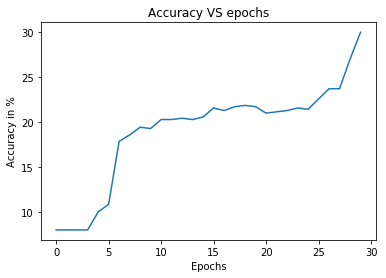

In [7]:
"""
Cifar-10 neural network based classifier

Dependencies
    - FFNN.py
"""

from FFNN import FFNN
from cifar_init import init_data
import numpy as np
import pylab
################################
### Training variables
TRAIN_SIZE = 7000
TEST_SIZE = 700
# Train for 30 epochs
EPOCHS = 30
# each iteration use a batch of 2 items
BATCH_SIZE = 2
# learning rate 1e-2
LR = 1e-2

# create NN object with 2 hidden layers each with 50 neuron
NN = FFNN([3072, 50, 50, 10], batch=BATCH_SIZE, eta=LR, cost_funct='ce')
################################

DATASET_DIR = 'F:\\Handasa\\Computer\\4th 7asbat\\Neural Networks\\labs\\KNN\\cifar-10-batches-py'
X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, CLASSES = \
        init_data(num_samples=TRAIN_SIZE, num_test=TEST_SIZE, cifar10_dir=DATASET_DIR)

# converting output into one hot encoding
Y_TRAIN = np.eye(10, 10)[Y_TRAIN]
Y_TEST = np.eye(10, 10)[Y_TEST]

Y_AXIS = np.zeros([EPOCHS])

for i in range(EPOCHS):
    for j in range(0,TRAIN_SIZE,BATCH_SIZE):
        mini_batch_in = X_TRAIN[j:j+BATCH_SIZE, :].T
        mini_batch_target = Y_TRAIN[j:j+BATCH_SIZE, :].T
        NN.train_step(mini_batch_in, mini_batch_target)

    # shuffle/epoch logic is not implemented
    print ("Epoch :", i)
    acc = 0.0
    for jj in range(0,TEST_SIZE,BATCH_SIZE):
        acc += NN.test_acc(X_TEST[jj:jj+BATCH_SIZE,:].T, Y_TEST[jj:jj+BATCH_SIZE,:].T)

    acc = 100*acc/TEST_SIZE
    print ("Accuracy: ", acc, "%")
    Y_AXIS[i] = acc


pylab.plot(Y_AXIS)
pylab.xlabel("Epochs")
pylab.ylabel("Accuracy in %")
pylab.title('Accuracy VS epochs')
pylab.show()


## Cifar 10 initiallization and NN creation function [Keras]
The next code loads the cifar-10 dataset, and attempts to divide the returned test data into `50%` validation and `50%` test

The code defines the function that trains and plots both error and accuracy during the training; a neural network with **two** hidden layers is created, the number of neurons at each layer is given as an argument for testing purposes.

Note the code below is using a softmax output activation function not a sigmoid, with a cross-entropy error function

In [5]:
"""
Code that simulates a FFNN with two hidden layer
to classify cifar-10 data set

Assumes the data-set location is given and set correctly
In my case it is located at 'user\.keras\datasets\cifar-10-batches-py'
"""

import os
import time
import keras
import numpy as np
from keras.datasets import cifar10
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.optimizers import SGD
import pylab

#### Loading data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### One hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# 50% validation, 50% test
x_valid = x_test[:5000, :]
y_valid = y_test[:5000, :]

x_test = x_test[5000:, :]
y_test = y_test[5000:, :]
####



### create a stack of layers
def test_nn(num_epochs=25, eta=1e-1, batch_size=128, hidden_neurons=50):
    """
    Creates a neural network FF and attempts to plot the training/valid loss and acc
    Note: i am using the test data as the validation data

    args:
    + num_epochs : the number of epochs to train
    + eta : learning rate
    + batch_size : the batch size
    """

    model = Sequential()

    # create an input layer followed by 50 sigmoid neurons
    in_layer = Dense(hidden_neurons, input_dim=3072,activation='sigmoid')
    model.add(in_layer)

    # 2nd hidden layer of 50 sigmoid neurons
    model.add(Dense(hidden_neurons,activation='sigmoid'))
    # output layer with 10 softmax neurons
    model.add(Dense(10, activation='softmax'))

    # optimizer object, with eta = 0.01
    sgd = SGD(lr=0.01)

    model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["categorical_accuracy"])
    
    t = time.time()
    # show the progress during iteration
    history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, validation_data=(x_valid, y_valid))
    elapsed = time.time() - t
    print("Training time: ", elapsed, "S")
    print ("Train acc: ", history.history['categorical_accuracy'][-1])
    print ("Validation acc: ", history.history['val_categorical_accuracy'][-1])

    pylab.plot(history.history['val_categorical_accuracy'])
    pylab.plot(history.history['categorical_accuracy'])
    pylab.legend(['Validation', 'Train'], loc='upper right')
    pylab.title('Neural Network Accuracy')
    pylab.xlabel('Epoch')
    pylab.ylabel('Accuracy')
    pylab.show()
    pylab.plot(history.history['val_loss'])
    pylab.plot(history.history['loss'])
    pylab.legend(['Validation', 'Train'], loc='upper right')
    pylab.title('Neural Network Loss')
    pylab.xlabel('Epoch')
    pylab.ylabel('Error')
    pylab.show()
    return  model.evaluate(x_test, y_test,batch_size=batch_size, verbose=0)

In the next section i will check the network performance for different hidden unit size `2,5,10,20,50,100`and a fixed learning rate = `1e-1`

#######################################
Running with hidden unit size:  2
Training time:  21.227059841156006 S
Train acc:  0.100140000001
Validation acc:  0.1008


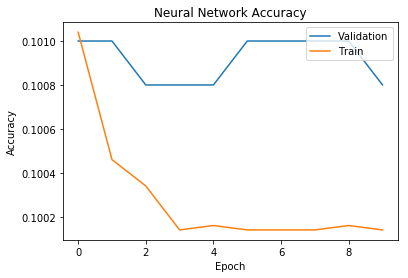

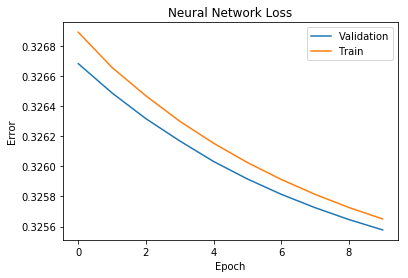

#######################################
Running with hidden unit size:  5
Training time:  21.25976872444153 S
Train acc:  0.104880000005
Validation acc:  0.0986


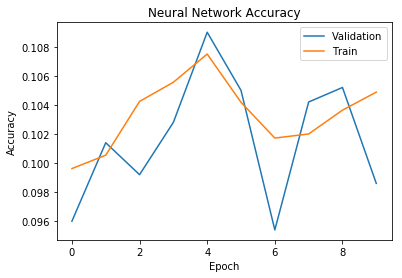

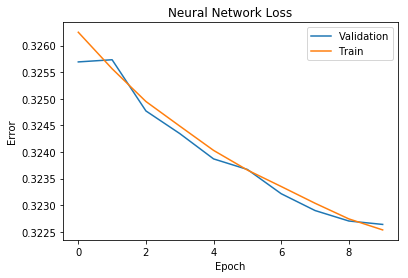

#######################################
Running with hidden unit size:  10
Training time:  21.10762643814087 S
Train acc:  0.141800000005
Validation acc:  0.1428


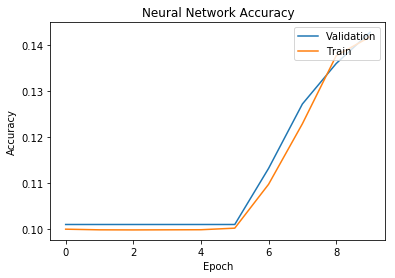

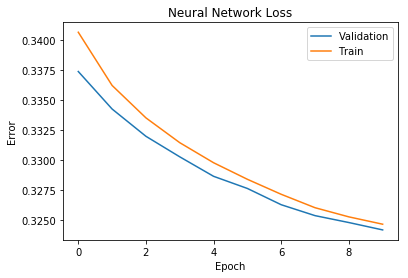

#######################################
Running with hidden unit size:  20
Training time:  21.14440369606018 S
Train acc:  0.20599999999
Validation acc:  0.213


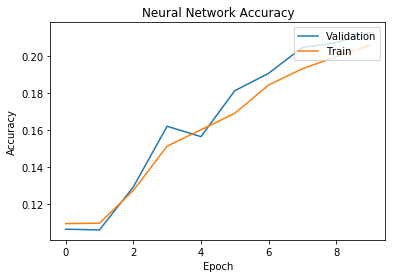

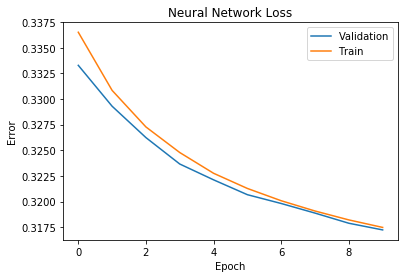

#######################################
Running with hidden unit size:  50
Training time:  21.713420152664185 S
Train acc:  0.22592000001
Validation acc:  0.2326


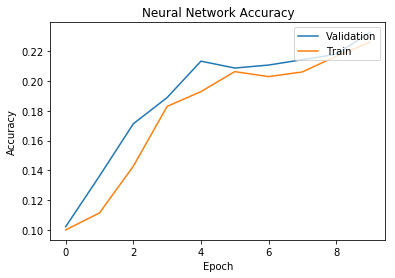

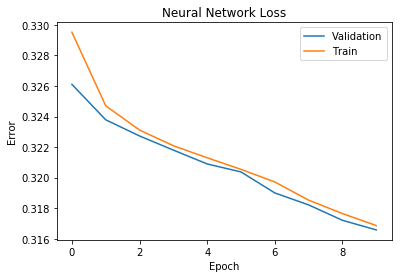

#######################################
Running with hidden unit size:  100
Training time:  22.951002597808838 S
Train acc:  0.272060000005
Validation acc:  0.2766


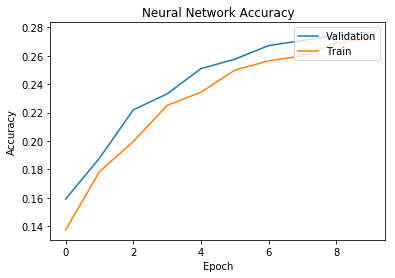

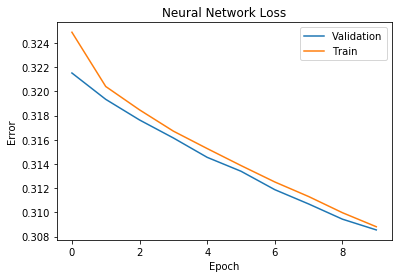

In [13]:
hidden_unit_size = [2,5,10,20,50,100]
# a dictionary of index => num_neurons/layer that saves (err, acc)
result_dict = {}
for i in hidden_unit_size:
    print ("#######################################")
    print ("Running with hidden unit size: ", str(i))
    result_dict[i] = test_nn(num_epochs = 10, hidden_neurons=i, eta=1e-2)

In [14]:
for i in result_dict:
    print ("Num neurons: ", i, "Error: ", result_dict[i][0], "Test Acc: ", result_dict[i][1]*100)

Num neurons:  2 Error:  0.325651143265 Test Acc:  9.94
Num neurons:  5 Error:  0.322648079538 Test Acc:  9.98
Num neurons:  10 Error:  0.324577234268 Test Acc:  14.46
Num neurons:  20 Error:  0.31761256094 Test Acc:  20.36
Num neurons:  50 Error:  0.316971618843 Test Acc:  21.14
Num neurons:  100 Error:  0.308888262653 Test Acc:  26.56


The table below summarize the error and accuracy vs different number of hidden units when testing the network against the **test data**

Number of neurons | Time(s) | Validation Accuracy | Train Accuracy | Test Accuracy
--- | --- | ---
2 | 21.7 | `9.7%`| `10%`| `10%`| 
5 | 20.7 | `11%`| `13%`| `10%`| 
10 | 21 | `12%`| `13%`| `13%`| 
20 | 21.7 | `12%`| `9.7%`| `19%`| 
50 | 21.3 | `23%`| `24%`| `23%`| 
100 | 21.9 | `28%`| `26%`| `25%`| 

In the next section i will be trying different learning rates for number of neurons = `100` at each hidden layer


#######################################
Running with Learnin rate:  0.1
Training time:  22.509794235229492 S
Train acc:  0.278979999981
Validation acc:  0.2832


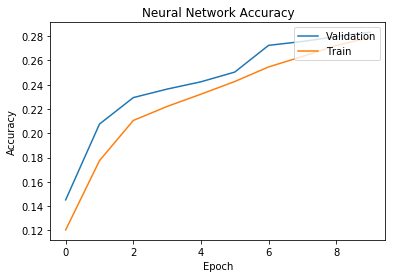

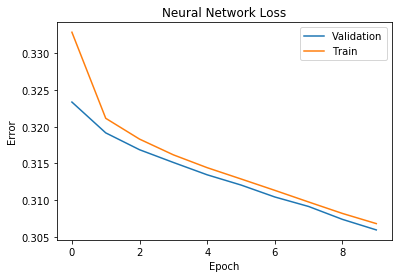

#######################################
Running with Learnin rate:  0.01
Training time:  22.297109842300415 S
Train acc:  0.26898000001
Validation acc:  0.2816


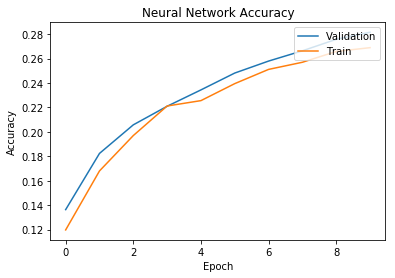

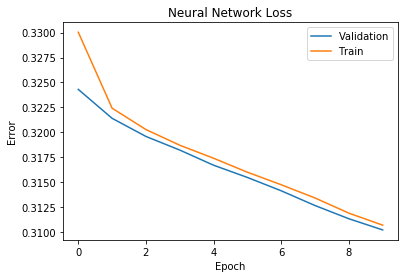

#######################################
Running with Learnin rate:  0.001
Training time:  22.25976848602295 S
Train acc:  0.259459999981
Validation acc:  0.2696


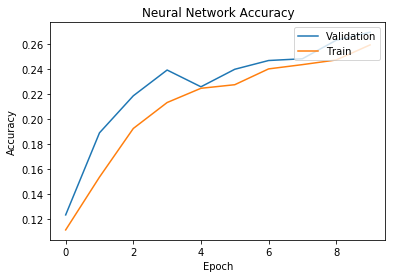

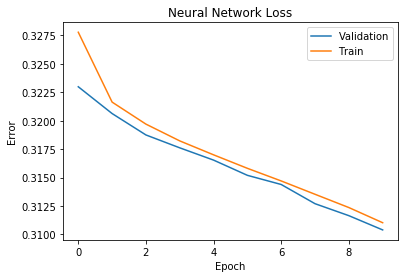

In [9]:
LR = [1e-1,1e-2,1e-3]
# a dictionary of index => num_neurons/layer that saves (err, acc)
result_dict2 = {}
for i in LR:
    print ("#######################################")
    print ("Running with Learnin rate: ", str(i))
    result_dict2[i] = test_nn(num_epochs = 10, hidden_neurons=100, eta=i)

In [11]:
for i in result_dict2:
    print ("Num neurons: ", i, "Error: ", result_dict[i][0], "Test Acc: ", result_dict[i][1]*100)

Num neurons:  0.1 Error:  0.306552505636 Test Acc:  27.32
Num neurons:  0.01 Error:  0.310259496546 Test Acc:  27.46
Num neurons:  0.001 Error:  0.31109964056 Test Acc:  25.88


The table below summarize the error and accuracy vs different number of hidden units when testing the network against the **test data**

Learning rate | Time(s) | Validation Accuracy | Train Accuracy | Test Accuracy
--- | --- | ---
`1e-1` | 22.5 | `28%`| `27%`| `27.3%`| 
`1e-2` | 22.29 | `28%`| `26%`| `27.4%`| 
`1e-3` | 22.25 | `26%`| `25%`| `25.8%`| 

In the next section i will be trying different batch size for number of neurons = `100` at each hidden layer aand et = `0.01`


#######################################
Running with batch size:  32
Training time:  68.50409412384033 S
Train acc:  0.29076
Validation acc:  0.2862


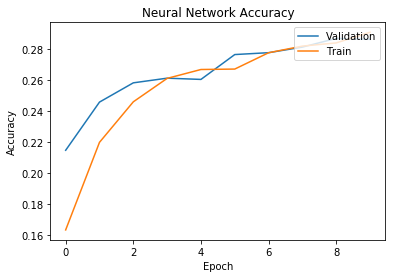

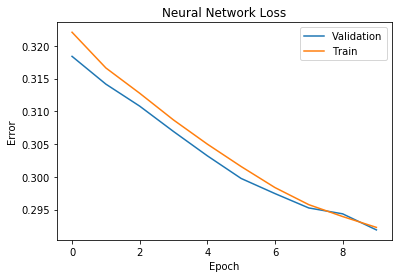

#######################################
Running with batch size:  64
Training time:  34.90403747558594 S
Train acc:  0.29636
Validation acc:  0.3158


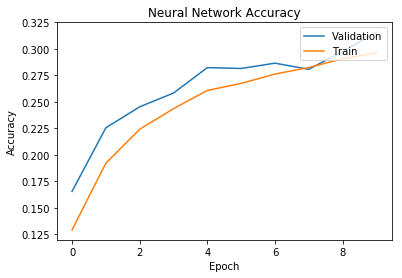

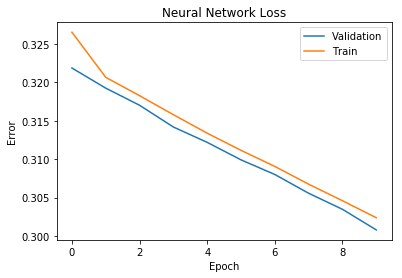

#######################################
Running with batch size:  128
Training time:  23.115239143371582 S
Train acc:  0.25677999999
Validation acc:  0.2492


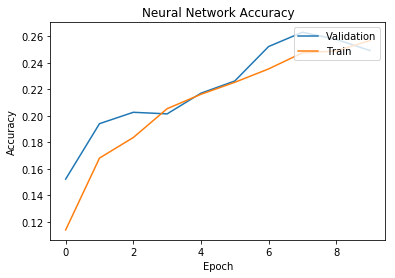

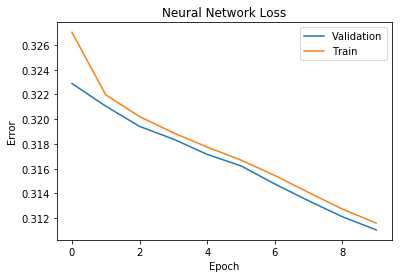

#######################################
Running with batch size:  256
Training time:  15.88356637954712 S
Train acc:  0.233400000005
Validation acc:  0.237199999905


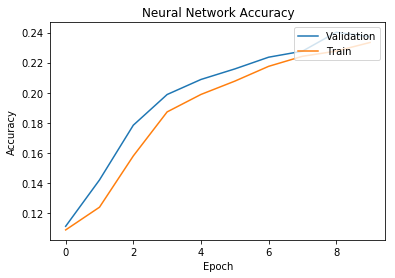

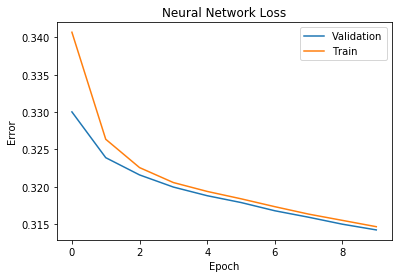

In [16]:
batch_s = [32, 64, 128, 256]
# a dictionary of index => num_neurons/layer that saves (err, acc)
result_dict3 = {}
for i in batch_s:
    print ("#######################################")
    print ("Running with batch size: ", str(i))
    result_dict3[i] = test_nn(num_epochs = 10, hidden_neurons=100, eta=0.01, batch_size=i)